In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import mean
from numpy import std

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# extras
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
     

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock/merge_yahooquery_wallstreet',parse_dates=['created_date'])

In [4]:
df=df.drop(columns=(['Unnamed: 0','Unnamed: 0.1','splits','dividends']),axis=1)

In [5]:
df.sample(5)

,Ticker,open,low,close,volume,high,adjclose,created_date,Price,Price_Target,Consensus
1620,KO,62.470001,62.049999,62.349998,12319600,62.500000,61.439644,2022-11-22,62.08,67.92,1.0
6808,SONY,88.959999,88.730003,89.550003,575700,89.690002,89.550003,2023-01-25,89.31,125.00,1.0
5280,LMT,403.149994,401.540009,431.839996,4588500,435.510010,426.478699,2022-10-18,409.99,444.88,1.0
2797,ORCL,83.199997,82.580002,83.349998,4798900,83.620003,83.038628,2022-12-02,83.03,88.58,2.0
5735,T,18.930000,18.889999,19.090000,21486000,19.110001,18.818264,2022-11-23,19.00,21.20,1.0


In [6]:
df[df.duplicated()]

,Ticker,open,low,close,volume,high,adjclose,created_date,Price,Price_Target,Consensus
3,AAPL,142.089996,134.380005,138.380005,140814800,142.669998,138.169037,2022-11-04,138.88,183.73,0.0
4,AAPL,142.089996,134.380005,138.380005,140814800,142.669998,138.169037,2022-11-04,138.88,183.73,0.0
5,AAPL,142.089996,134.380005,138.380005,140814800,142.669998,138.169037,2022-11-04,138.88,183.73,0.0
6,AAPL,142.089996,134.380005,138.380005,140814800,142.669998,138.169037,2022-11-04,138.88,183.73,0.0
8,AAPL,138.500000,134.589996,134.869995,74917800,138.550003,134.664383,2022-11-09,139.50,182.59,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7174,BUD,59.650002,59.220001,59.480000,895300,59.770000,59.480000,2022-12-19,59.63,58.63,2.0
7185,BUD,60.080002,59.730000,59.869999,2386300,60.230000,59.869999,2023-02-02,60.29,58.63,2.0
7192,BUD,59.950001,59.790001,60.000000,2040500,60.220001,60.000000,2023-03-08,61.09,58.63,2.0
7200,SYK,280.350006,280.070007,283.140015,1535300,284.000000,283.140015,2023-02-03,282.48,265.58,1.0


In [7]:
df = df.drop_duplicates()

In [8]:
df.isnull().sum()

Ticker            0
open              0
low               0
close             0
volume            0
high              0
adjclose          0
created_date      0
Price             0
Price_Target    340
Consensus         6
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5639 entries, 0 to 7222
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ticker        5639 non-null   object        
 1   open          5639 non-null   float64       
 2   low           5639 non-null   float64       
 3   close         5639 non-null   float64       
 4   volume        5639 non-null   int64         
 5   high          5639 non-null   float64       
 6   adjclose      5639 non-null   float64       
 7   created_date  5639 non-null   datetime64[ns]
 8   Price         5639 non-null   float64       
 9   Price_Target  5299 non-null   float64       
 10  Consensus     5633 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 528.7+ KB


In [13]:
df.describe()

,open,low,close,volume,high,adjclose,Price,Price_Target,Consensus
count,5639.000000,5639.000000,5639.000000,5.639000e+03,5639.000000,5639.000000,5639.000000,5299.000000,5633.000000
mean,177.168231,175.145848,177.224753,1.186515e+07,179.159588,176.452681,177.088854,221.597907,0.813776
std,145.177448,143.547804,145.319025,2.267503e+07,146.883969,144.790257,145.232801,182.754855,0.743539
min,14.090000,13.870000,14.350000,2.450000e+04,14.390000,12.718632,13.980000,21.070000,0.000000
25%,79.570000,78.685001,79.580002,2.164550e+06,80.445000,78.931404,79.595000,93.630000,0.000000
50%,126.160004,124.830002,126.199997,4.584000e+06,127.260002,125.580002,126.020000,158.390000,1.000000
75%,226.825005,224.280006,225.809998,1.012985e+07,229.834999,225.809998,226.270000,291.770000,1.000000
max,763.900024,763.140015,770.729980,3.065906e+08,781.770020,765.187073,770.730000,1440.000000,3.000000


In [14]:
df.isnull().sum()

Ticker            0
open              0
low               0
close             0
volume            0
high              0
adjclose          0
created_date      0
Price             0
Price_Target    340
Consensus         6
dtype: int64

In [15]:
def classifyFeatures(data):
    numericFeatures = []
    categoricalFeatures = []
    otherFeatures = []

    for feature in df.columns:
        if data[feature].dtype == 'float64' or data[feature].dtype == 'int64':
            numericFeatures.append(feature)
        elif data[feature].dtype == 'object' or data[feature].dtype == 'bool':
            categoricalFeatures.append(feature)
        else:
            otherFeatures.append(feature)
    return {'numericFeatures':numericFeatures,'categoricalFeatures':categoricalFeatures,'otherFeatures':otherFeatures}  

numericFeatures,categoricalFeatures,otherFeatures = classifyFeatures(df).values()
print(f'numericFeatures : {numericFeatures},',f'categoricalFeatures : {categoricalFeatures},',f'otherFeatures : {otherFeatures}')

numericFeatures : ['open', 'low', 'close', 'volume', 'high', 'adjclose', 'Price', 'Price_Target', 'Consensus'], categoricalFeatures : ['Ticker'], otherFeatures : ['created_date']


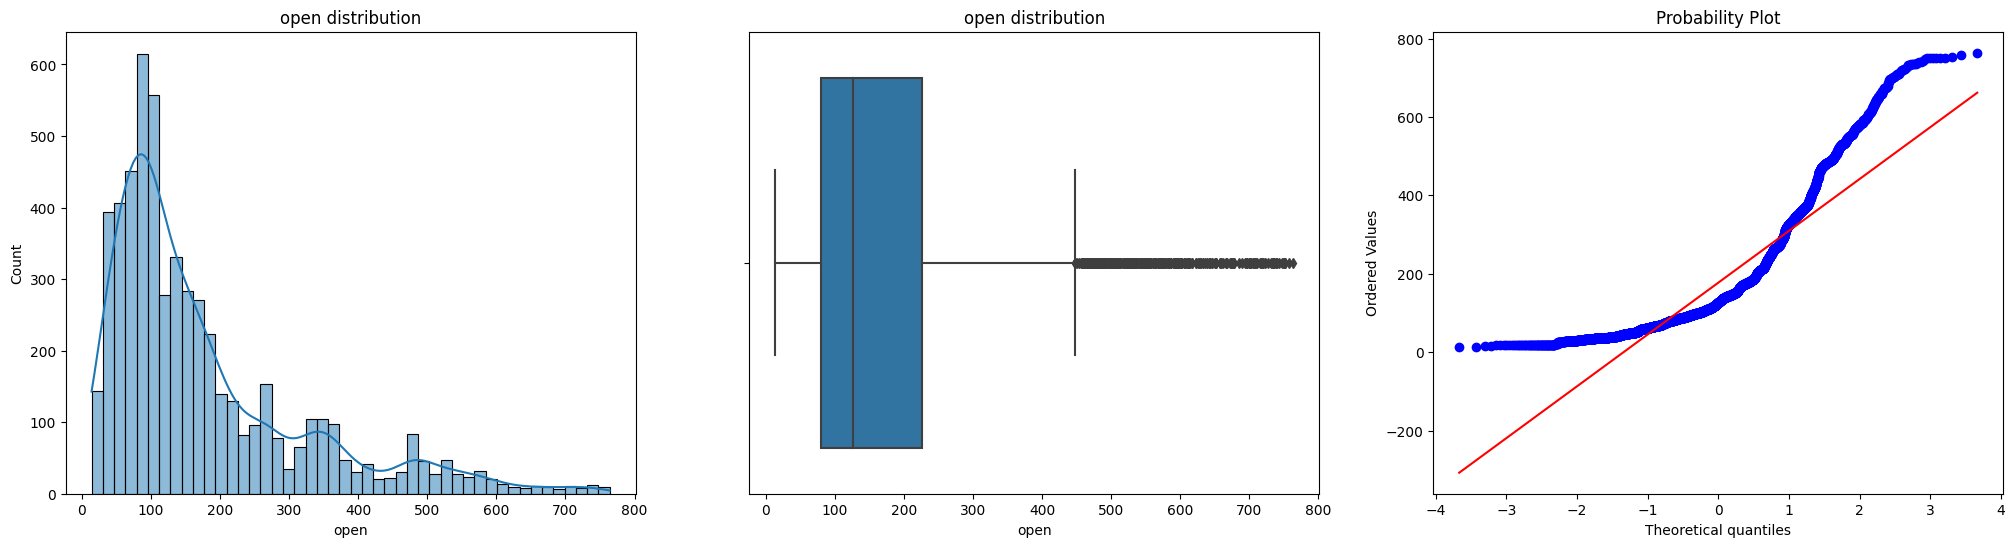

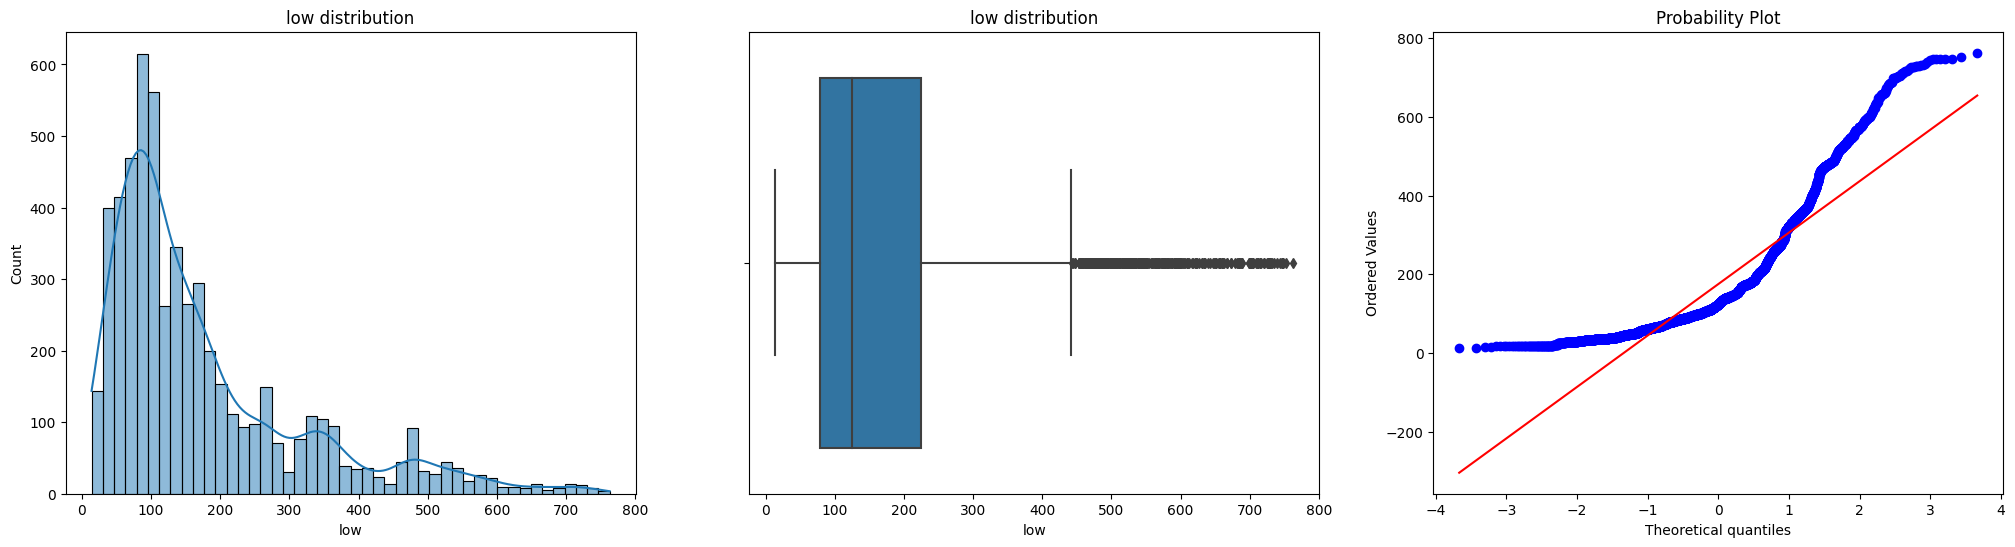

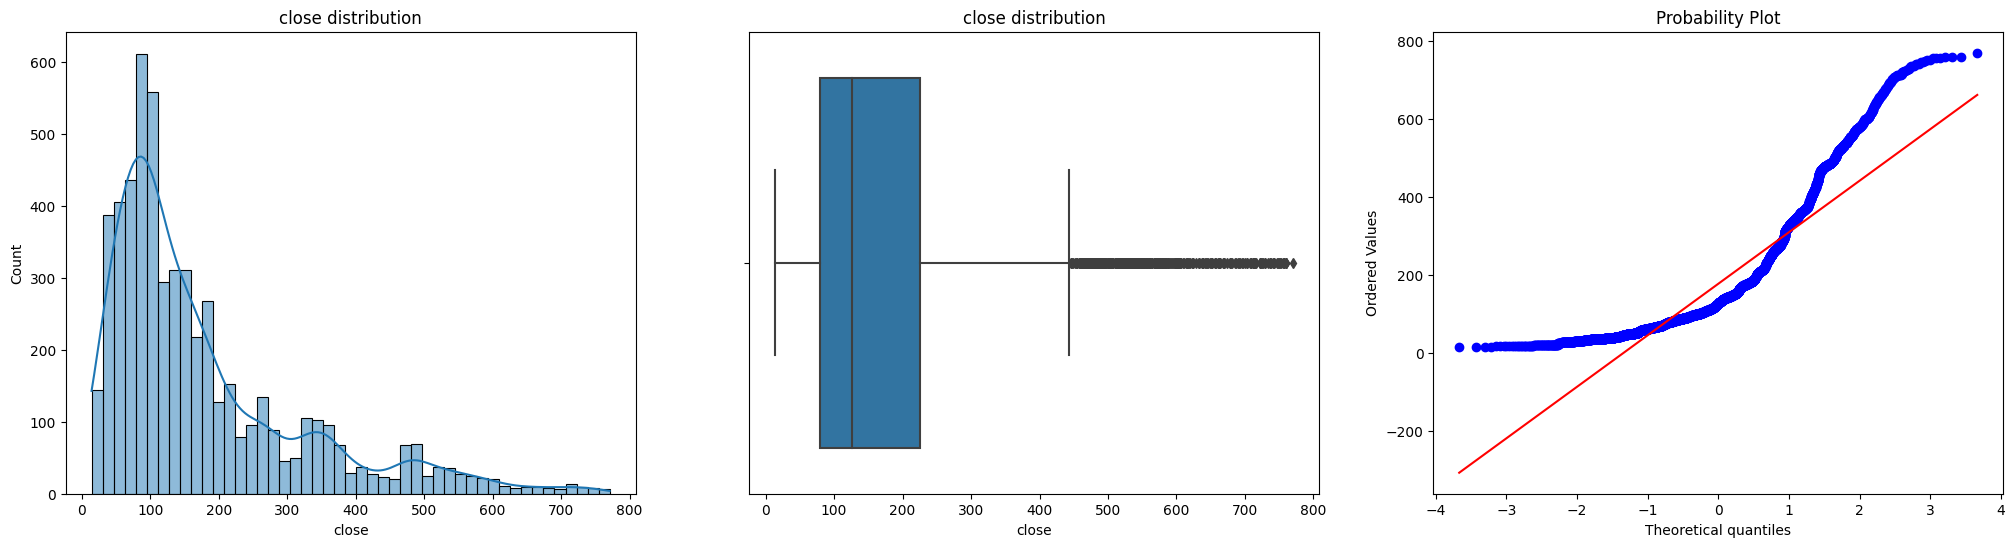

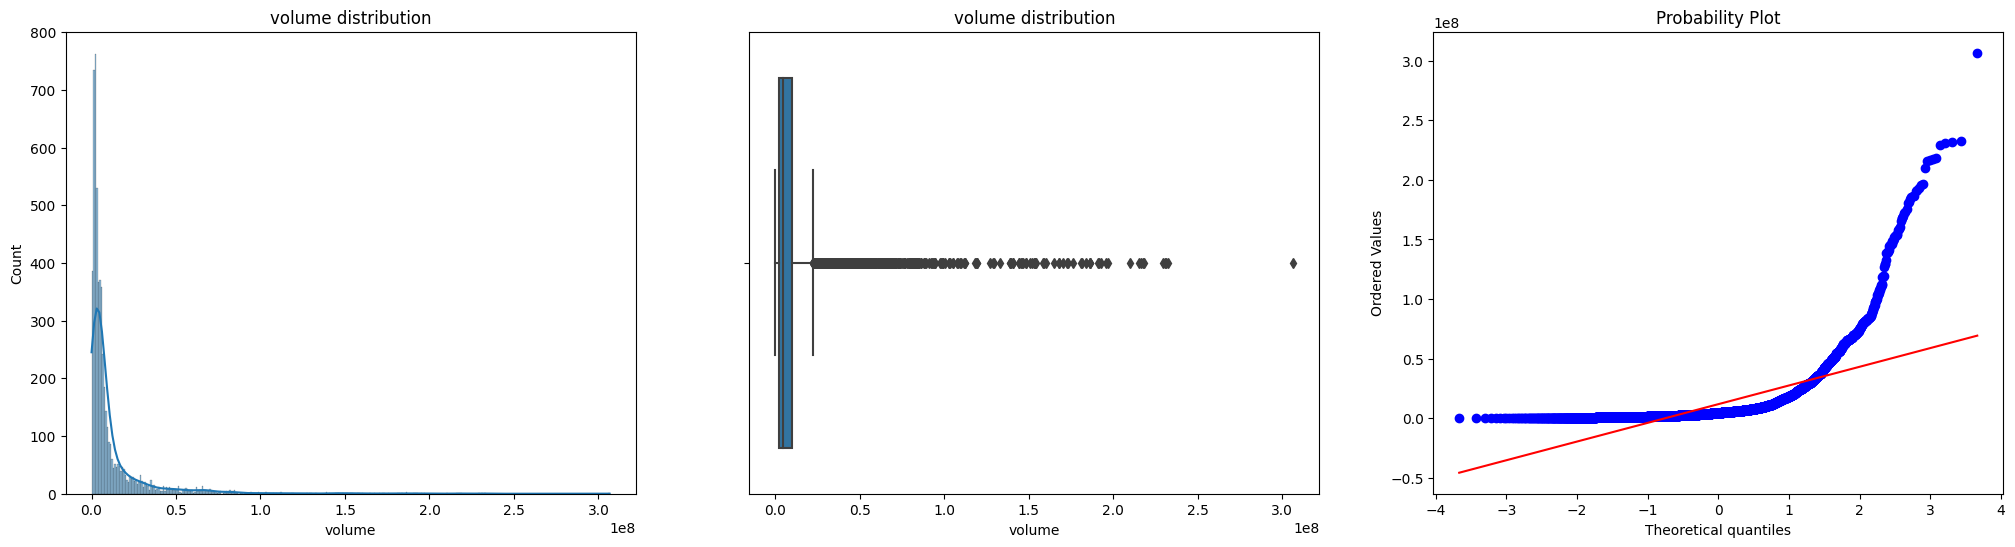

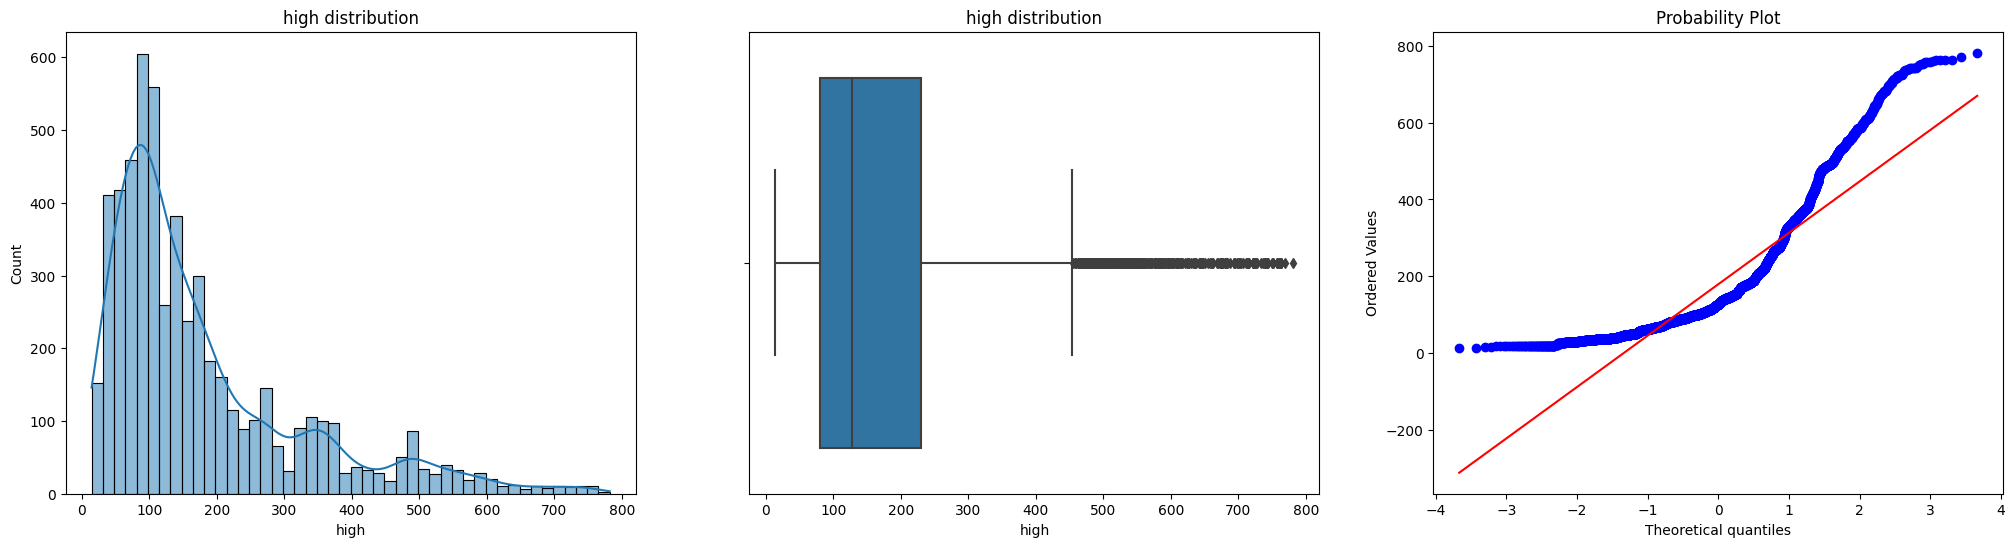

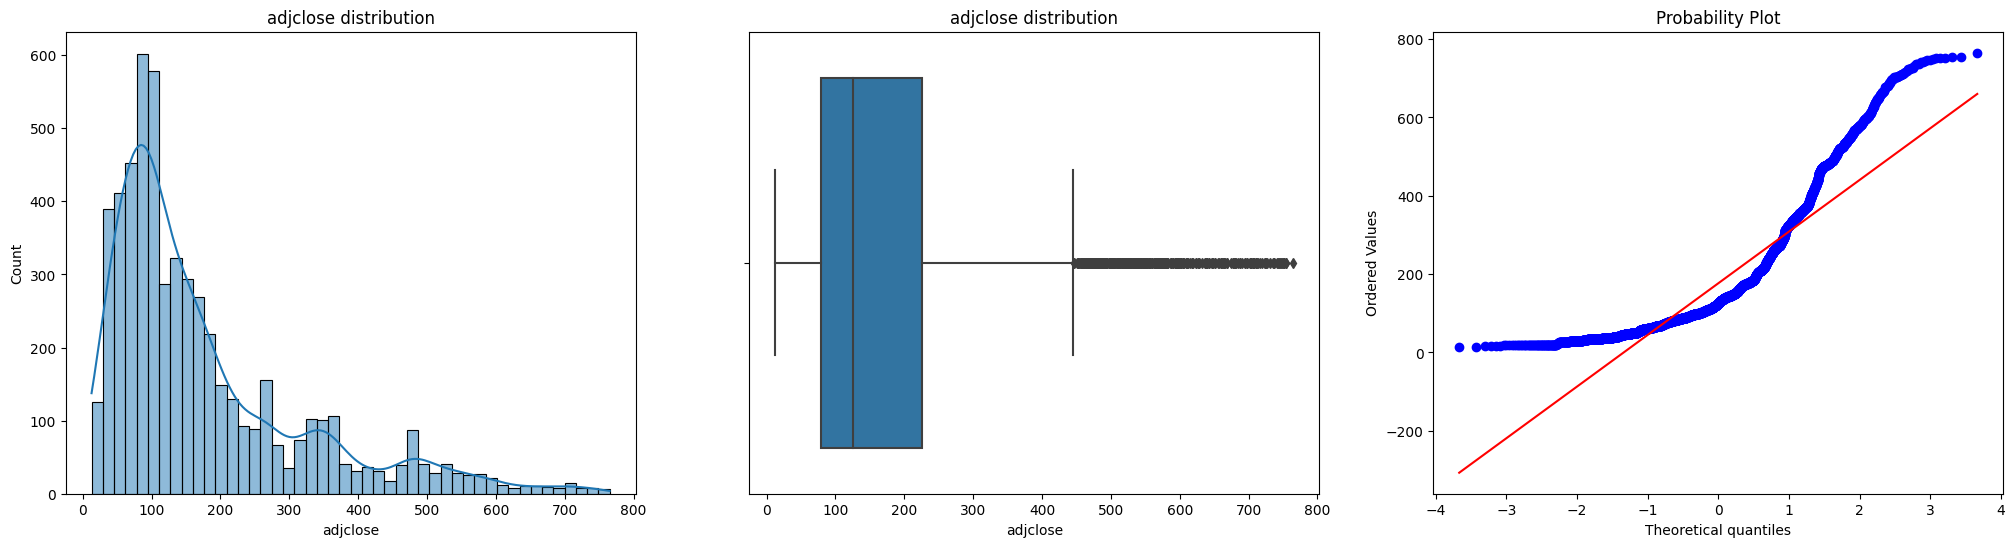

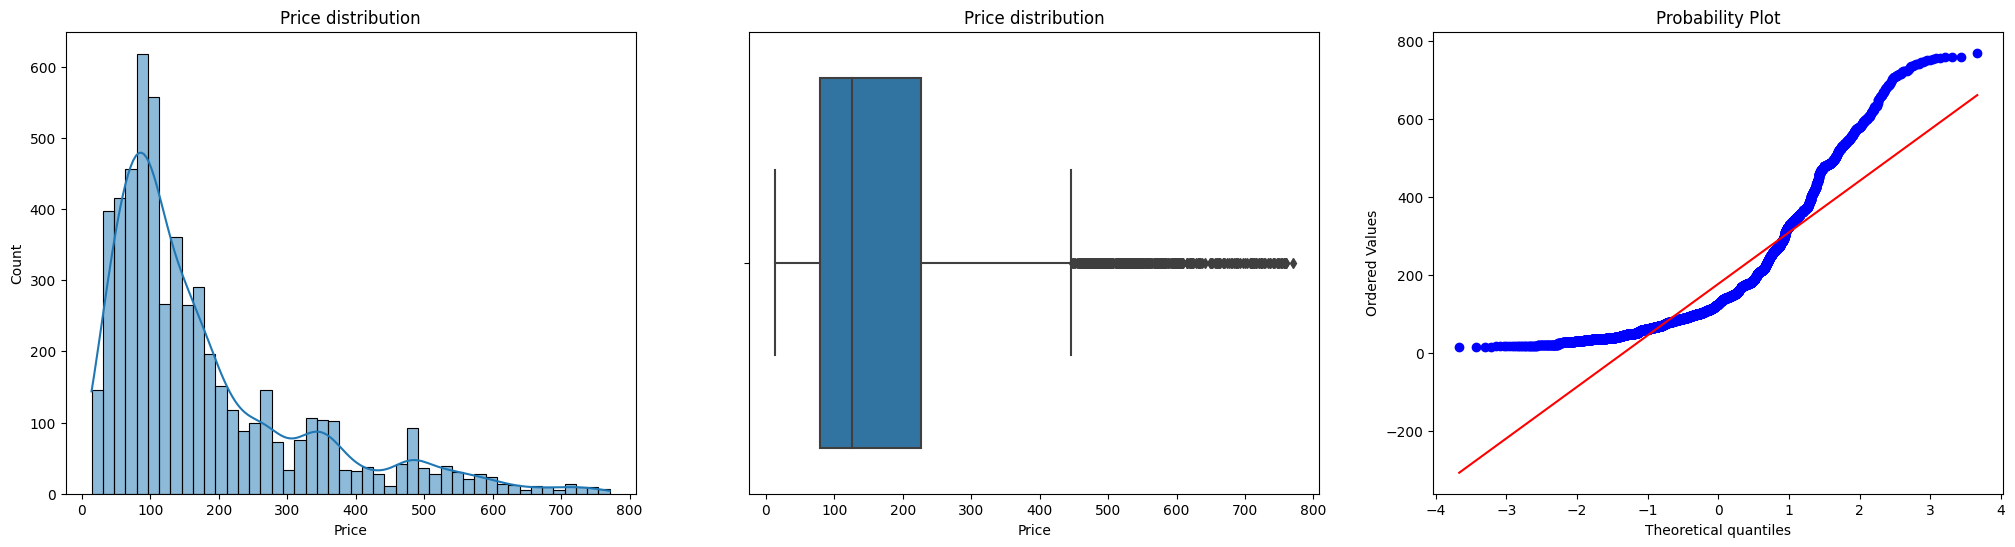

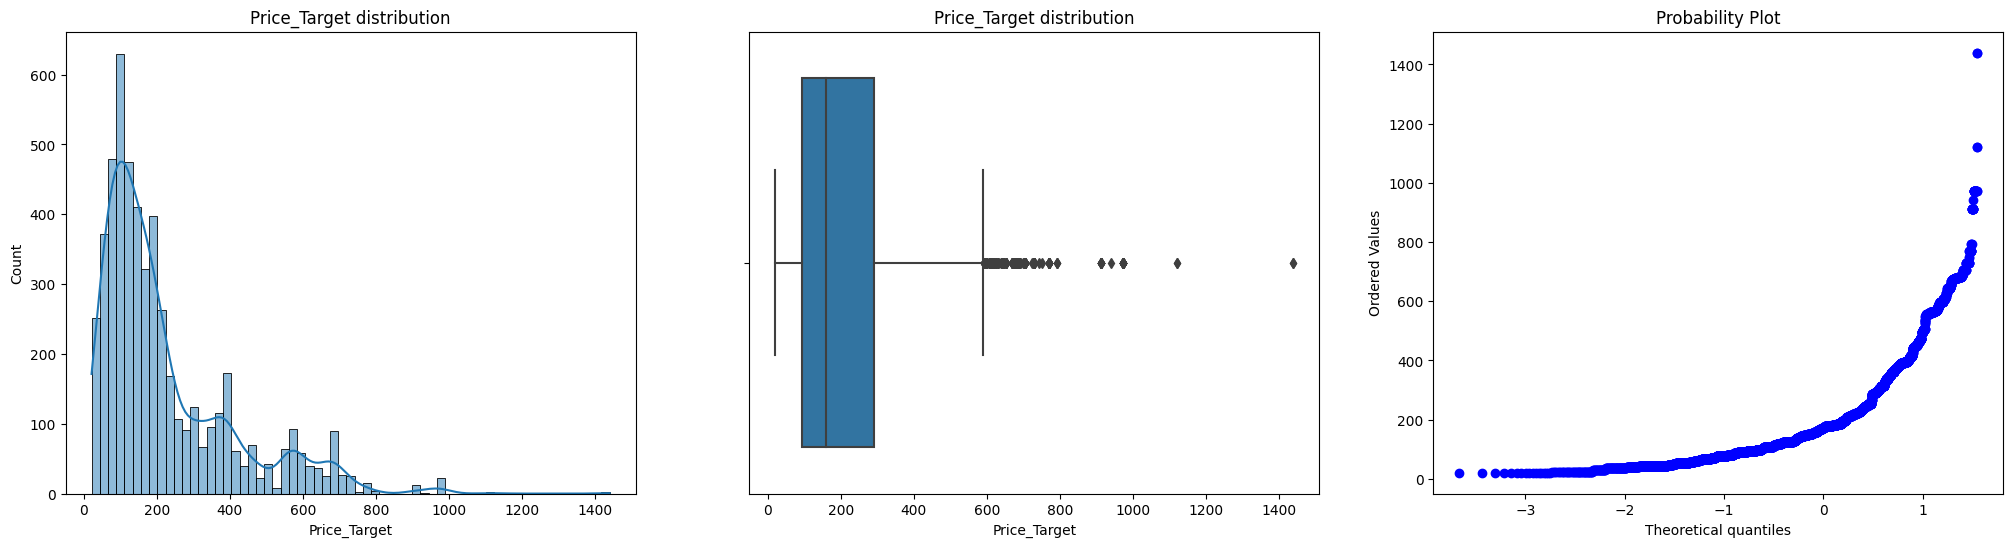

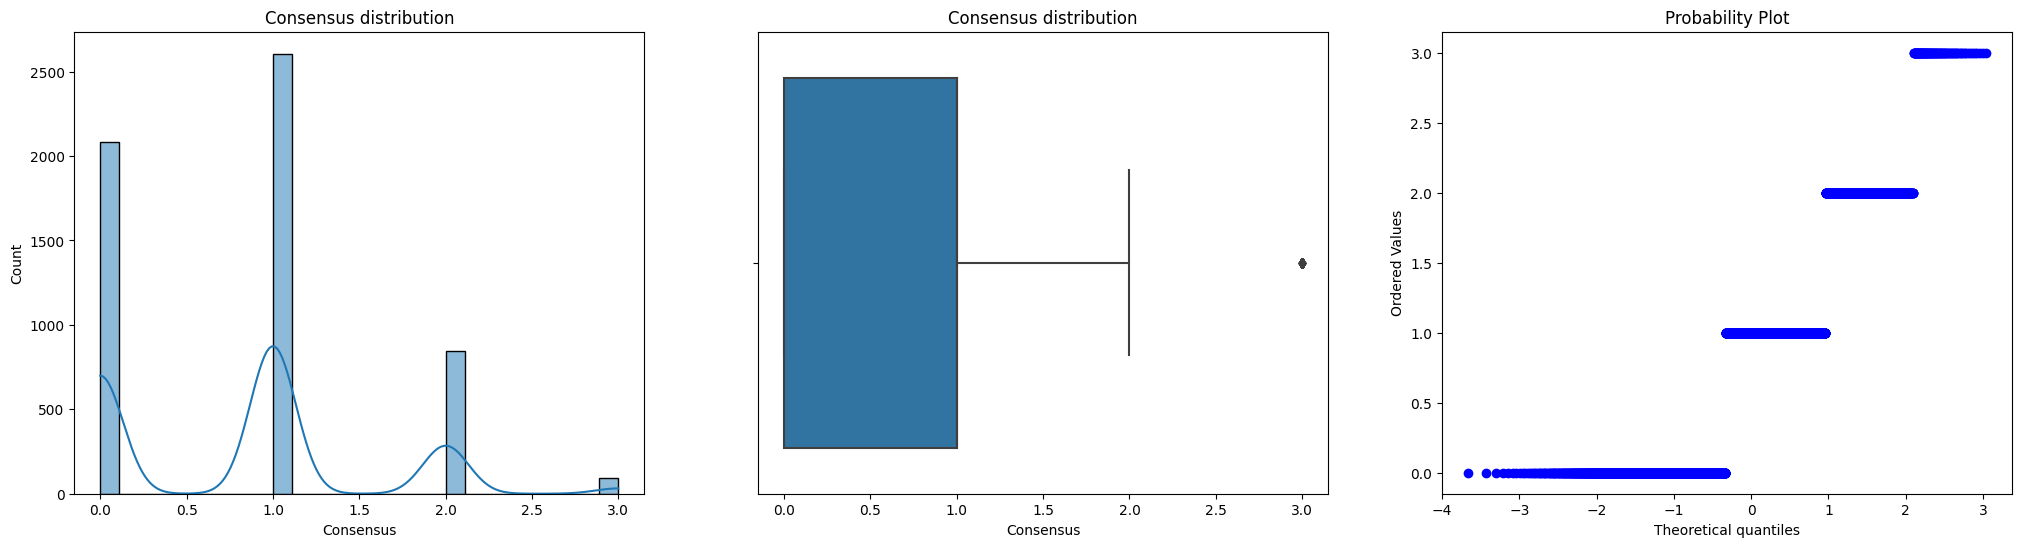

In [ ]:
def univarientAnalysis(numericFeatures,data):
    for feature in numericFeatures: 
        fig, ax = plt.subplots(1,3, figsize=(25,6))
        sns.histplot(data[feature],ax=ax[0], kde=True).set(title=f'{feature} distribution')
        sns.boxplot(data=data,x=data[feature],ax=ax[1]).set(title=f'{feature} distribution')
        stats.probplot(data[feature], dist="norm", plot=plt)
        plt.show()
univarientAnalysis(numericFeatures,df)

In [16]:
df_testing=df.copy()

In [17]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5639 entries, 0 to 7222
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ticker        5639 non-null   object        
 1   open          5639 non-null   float64       
 2   low           5639 non-null   float64       
 3   close         5639 non-null   float64       
 4   volume        5639 non-null   int64         
 5   high          5639 non-null   float64       
 6   adjclose      5639 non-null   float64       
 7   created_date  5639 non-null   datetime64[ns]
 8   Price         5639 non-null   float64       
 9   Price_Target  5299 non-null   float64       
 10  Consensus     5633 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 528.7+ KB


In [72]:
df_testing['Ticker'].value_counts().tail(10)

BUD     23
ADP     22
AMT      9
SYK      9
TRC      6
CI       3
AMAT     3
PBR      2
C        2
GE       2
Name: Ticker, dtype: int64

In [73]:
df_testing['Ticker_Merged'] = df_testing['Ticker']
ticker_vc = df_testing['Ticker'].value_counts()
ticker_to_merge = ticker_vc[ticker_vc < 10].index.tolist()

In [75]:
ticker_vc

AAPL    57
ELV     57
LOW     57
UNP     57
RY      57
        ..
CI       3
AMAT     3
PBR      2
C        2
GE       2
Name: Ticker, Length: 109, dtype: int64

In [76]:
df_testing.loc[df_testing['Ticker'].isin(ticker_to_merge), 'Ticker_Merged'] = 'Other'

In [77]:
print(df_testing['Ticker_Merged'].value_counts())

AAPL     57
ELV      57
LOW      57
UNP      57
RY       57
         ..
PDD      41
Other    36
EQNR     29
BUD      23
ADP      22
Name: Ticker_Merged, Length: 102, dtype: int64


In [79]:
df_testing=df_testing.drop(columns='Ticker')

In [18]:
df_testing.columns

Index(['Ticker', 'open', 'low', 'close', 'volume', 'high', 'adjclose',
       'created_date', 'Price', 'Price_Target', 'Consensus'],
      dtype='object')

In [19]:
df_testing['Consensus'].value_counts()

1.0    2606
0.0    2085
2.0     848
3.0      94
Name: Consensus, dtype: int64

In [20]:
# convert date column to pandas datetime object
df_testing['created_date'] = pd.to_datetime(df_testing['created_date'], format='%Y-%m-%d')

# convert to Unix timestamp (in seconds)
df_testing['created_date_unix'] = df_testing['created_date'].astype(int) // 10**9

In [21]:
df_testing=df_testing.drop(columns=['created_date'])

In [80]:
X_train,X_test,y_train,y_test = train_test_split(df_testing.drop(columns=['Consensus']),
                                                 df_testing['Consensus'],
                                                 test_size=0.20,
                                                random_state=12)


In [81]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4511, 10), (1128, 10), (4511,), (1128,))

In [84]:
X_test['Ticker_Merged'].value_counts()

DHR     17
LLY     17
JNJ     17
HON     16
IBM     16
        ..
NEE      6
COP      5
TXN      4
BUD      3
EQNR     3
Name: Ticker_Merged, Length: 102, dtype: int64

In [67]:
X_test['Ticker'].value_counts()

TXN     22
ABBV    21
SNY     21
AXP     20
TM      20
        ..
CI       2
TRC      2
GE       2
PBR      1
AMAT     1
Name: Ticker, Length: 107, dtype: int64

Handling Missing Value

In [85]:
X_train['Price_Target_NA'] = np.where(X_train['Price_Target'].isnull()==True,1,0)
X_test['Price_Target_NA'] = np.where(X_test['Price_Target'].isnull()==True,1,0)

In [86]:
X_train['Price_Target'] = X_train['Price_Target'].fillna(X_train['Price_Target'].median())
X_test['Price_Target'] = X_test['Price_Target'].fillna(X_test['Price_Target'].median())

In [87]:
y_train= y_train.fillna(y_train.median())
y_test = y_test.fillna(y_test.median())

In [88]:
y_train.isnull().sum()

0

Transformation

In [89]:
X_train['open'] = X_train['open']**(1/2)
X_test['open']= X_test['open']**(1/2)

In [90]:
X_train['low'] = X_train['low']**(1/2)
X_test['low']= X_test['low']**(1/2)

In [91]:
X_train['close'] = X_train['close']**(1/2)
X_test['close']= X_test['close']**(1/2)

In [92]:
X_train['volume'] = X_train['volume']**(1/2)
X_test['volume']= X_test['volume']**(1/2)

In [93]:
X_train['high'] = X_train['high']**(1/2)
X_test['high']= X_test['high']**(1/2)

In [94]:
X_train['adjclose'] = X_train['adjclose']**(1/2)
X_test['adjclose']= X_test['adjclose']**(1/2)

In [95]:
X_train['Price'] = X_train['Price']**(1/2)
X_test['Price']= X_test['Price']**(1/2)

In [96]:
X_train['Price_Target'] = X_train['Price_Target']**(1/2)
X_test['Price_Target']= X_test['Price_Target']**(1/2)

Handling Outlier

In [97]:
def handlingOuliersIQRExe(feature,X_train,X_test):    
    # Finding the IQR
    X_train_percentile25 = X_train[feature].quantile(0.25)
    X_train_percentile75 = X_train[feature].quantile(0.75)
    
    X_test_percentile25 = X_test[feature].quantile(0.25)
    X_test_percentile75 = X_test[feature].quantile(0.75)
    
    X_train_iqr = X_train_percentile75 - X_train_percentile25
    X_test_iqr = X_test_percentile75 - X_test_percentile25
    
    X_train_upper_limit = X_train_percentile75 + 1.5 * X_train_iqr
    X_train_lower_limit = X_train_percentile25 - 1.5 * X_train_iqr
    
    X_test_upper_limit = X_test_percentile75 + 1.5 * X_test_iqr
    X_test_lower_limit = X_test_percentile25 - 1.5 * X_test_iqr
    
    X_train[feature]= np.where(X_train[feature] > X_train_upper_limit, X_train_upper_limit,
                       np.where(X_train[feature] < X_train_lower_limit, X_train_lower_limit, X_train[feature]))
    X_test[feature]= np.where(X_test[feature] > X_test_upper_limit, X_test_upper_limit,
                       np.where(X_test[feature] < X_test_lower_limit, X_test_lower_limit, X_test[feature]))


In [98]:
OutlierFeature = ['open','low','close','volume','high','adjclose','Price','Price_Target']
for feature in OutlierFeature:
    handlingOuliersIQRExe(feature,X_train,X_test)

Encoding

In [100]:
X_train=pd.get_dummies(X_train,columns=['Ticker_Merged'])
X_test=pd.get_dummies(X_test,columns=['Ticker_Merged'])
X_train.shape,X_test.shape

((4511, 112), (1128, 112))

Standard Scalling

In [120]:
X_train_sd,X_test_sd = X_train.copy(),X_test.copy()

In [103]:
X_train_lg.describe()

,open,low,close,volume,high,adjclose,Price,Price_Target,created_date_unix,Price_Target_NA,Ticker_Merged_AAPL,Ticker_Merged_ABBV,Ticker_Merged_ABT,Ticker_Merged_ACN,Ticker_Merged_ADBE,Ticker_Merged_ADP,Ticker_Merged_AMD,Ticker_Merged_AMGN,Ticker_Merged_AMZN,Ticker_Merged_ASML,Ticker_Merged_AVGO,Ticker_Merged_AXP,Ticker_Merged_AZN,Ticker_Merged_BA,Ticker_Merged_BABA,Ticker_Merged_BAC,Ticker_Merged_BHP,Ticker_Merged_BLK,Ticker_Merged_BMY,Ticker_Merged_BP,Ticker_Merged_BUD,Ticker_Merged_CAT,Ticker_Merged_CMCSA,Ticker_Merged_COP,Ticker_Merged_COST,Ticker_Merged_CRM,Ticker_Merged_CSCO,Ticker_Merged_CVS,Ticker_Merged_CVX,Ticker_Merged_DE,Ticker_Merged_DEO,Ticker_Merged_DHR,Ticker_Merged_DIS,Ticker_Merged_ELV,Ticker_Merged_EQNR,Ticker_Merged_GILD,Ticker_Merged_GOOGL,Ticker_Merged_GS,Ticker_Merged_HD,Ticker_Merged_HDB,Ticker_Merged_HON,Ticker_Merged_HSBC,Ticker_Merged_IBM,Ticker_Merged_INTC,Ticker_Merged_INTU,Ticker_Merged_JNJ,Ticker_Merged_JPM,Ticker_Merged_KO,Ticker_Merged_LIN,Ticker_Merged_LLY,Ticker_Merged_LMT,Ticker_Merged_LOW,Ticker_Merged_MA,Ticker_Merged_MCD,Ticker_Merged_MDT,Ticker_Merged_META,Ticker_Merged_MRK,Ticker_Merged_MS,Ticker_Merged_MSFT,Ticker_Merged_NEE,Ticker_Merged_NFLX,Ticker_Merged_NKE,Ticker_Merged_NVDA,Ticker_Merged_NVO,Ticker_Merged_NVS,Ticker_Merged_ORCL,Ticker_Merged_Other,Ticker_Merged_PDD,Ticker_Merged_PEP,Ticker_Merged_PFE,Ticker_Merged_PG,Ticker_Merged_PLD,Ticker_Merged_PM,Ticker_Merged_QCOM,Ticker_Merged_RIO,Ticker_Merged_RTX,Ticker_Merged_RY,Ticker_Merged_SAP,Ticker_Merged_SBUX,Ticker_Merged_SCHW,Ticker_Merged_SHEL,Ticker_Merged_SNY,Ticker_Merged_SONY,Ticker_Merged_SPGI,Ticker_Merged_T,Ticker_Merged_TD,Ticker_Merged_TM,Ticker_Merged_TMO,Ticker_Merged_TMUS,Ticker_Merged_TSLA,Ticker_Merged_TSM,Ticker_Merged_TTE,Ticker_Merged_TXN,Ticker_Merged_UL,Ticker_Merged_UNH,Ticker_Merged_UNP,Ticker_Merged_UPS,Ticker_Merged_V,Ticker_Merged_VZ,Ticker_Merged_WFC,Ticker_Merged_WMT,Ticker_Merged_XOM
count,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4.511000e+03,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000
mean,12.370169,12.299281,12.369707,2526.062065,12.438485,12.341587,12.367934,13.769529,1.673319e+09,0.062292,0.009089,0.009976,0.010641,0.009754,0.009976,0.003104,0.009311,0.010641,0.009532,0.010197,0.009976,0.009976,0.010419,0.008867,0.011306,0.010419,0.010419,0.009089,0.009976,0.008867,0.004434,0.010197,0.009754,0.011527,0.010197,0.009976,0.009089,0.008424,0.010862,0.009976,0.011084,0.008867,0.009532,0.010197,0.005764,0.008424,0.011084,0.010862,0.010197,0.010197,0.009089,0.010419,0.009089,0.009532,0.010641,0.008867,0.010197,0.009976,0.009532,0.008867,0.010197,0.010641,0.010641,0.010862,0.007759,0.009311,0.010197,0.009754,0.009089,0.011306,0.010419,0.010641,0.011084,0.010419,0.010197,0.011306,0.005

In [121]:
sl = StandardScaler()

In [123]:
sl.fit(X_train_sd)

StandardScaler()

In [ ]:
X_train_lg = pd.DataFrame(scaler.transform(X_train_lg),columns=X_train_lg.columns)
X_test_lg = pd.DataFrame(scaler.transform(X_test_lg),columns=X_test_lg.columns)

Robust scalling

In [127]:
X_train_rs,X_test_rs = X_train.copy(),X_test.copy()

In [125]:
from sklearn.preprocessing import RobustScaler

# initialize RobustScaler object
scaler = RobustScaler()


In [126]:
scaler.fit(X_train_lg)

RobustScaler()

In [108]:
X_train_lg = pd.DataFrame(scaler.transform(X_train_lg),columns=X_train_lg.columns)

In [109]:
X_test_lg = pd.DataFrame(scaler.transform(X_test_lg),columns=X_test_lg.columns)

Model Selection

Random Forest

In [101]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
  
# predict the mode
y_pred = model.predict(X_test)
  
# performance evaluatio metrics
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       413
         1.0       1.00      0.98      0.99       548
         2.0       0.94      0.99      0.97       146
         3.0       0.95      0.90      0.93        21

    accuracy                           0.98      1128
   macro avg       0.97      0.97      0.97      1128
weighted avg       0.99      0.98      0.98      1128



Hyperparameter Tuning- RandomizedSearchCV

In [128]:
param_grid = {
    'n_estimators': [25, 50, 100, 150,200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
random_search = RandomizedSearchCV(RandomForestClassifier(),
								param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=200)


In [ ]:
model_random = RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,n_estimators=200)
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))

Hyperparameter Tuning- RandomizedSearchCV(Standard Scalling)

In [133]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
								param_grid)
random_search.fit(X_train_sd, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)


In [134]:
model_random = RandomForestClassifier(max_depth=6, max_leaf_nodes=9,n_estimators=150)
model_random.fit(X_train_sd, y_train)
y_pred_rand = model.predict(X_test_sd)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.40      0.57      1024
         1.0       0.11      0.86      0.20        70
         2.0       0.22      1.00      0.36        34
         3.0       0.00      0.00      0.00         0

    accuracy                           0.45      1128
   macro avg       0.33      0.56      0.28      1128
weighted avg       0.91      0.45      0.54      1128



Hyperparameter Tuning- RandomizedSearchCV(Robust Scalling)

In [115]:
param_grid = {
    'n_estimators': [25, 50, 100, 150,200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
random_search = RandomizedSearchCV(RandomForestClassifier(),
								param_grid)
random_search.fit(X_train_lg, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9)


In [116]:
model_random = RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9)
model_random.fit(X_train_lg, y_train)
y_pred_rand = model.predict(X_test_lg)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       413
         1.0       1.00      0.98      0.99       547
         2.0       0.95      1.00      0.97       146
         3.0       1.00      0.91      0.95        22

    accuracy                           0.99      1128
   macro avg       0.98      0.97      0.98      1128
weighted avg       0.99      0.99      0.99      1128



XGBOOST

In [136]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Set up the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', reg_alpha=0.1, reg_lambda=0.1)

# Define hyperparameters and their ranges
params = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [200],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up grid search
grid_search1 = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and find the optimal hyperparameters
grid_search1.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search1.best_params_)


Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [140]:
xgb_model_grid = xgb.XGBClassifier(max_depth=5,
                                    colsample_bytree= 0.8,
                                    learning_rate= 0.1,
                                    subsample= 0.8,
                                    n_estimators=200)
xgb_model_grid.fit(X_train, y_train)
y_pred_grid = xgb_model_grid.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       411
           1       0.99      0.98      0.98       547
           2       0.95      0.99      0.97       148
           3       1.00      0.91      0.95        22

    accuracy                           0.98      1128
   macro avg       0.98      0.97      0.97      1128
weighted avg       0.98      0.98      0.98      1128



XGBOOST(robust scalling)

In [143]:
# Set up grid search
grid_search2 = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model and find the optimal hyperparameters
grid_search2.fit(X_train_rs, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search2.best_params_)

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [144]:
xgb_model_grid_rs = xgb.XGBClassifier(max_depth=5,
                                    colsample_bytree= 0.8,
                                    learning_rate= 0.1,
                                    subsample= 0.8,
                                    n_estimators=200)
xgb_model_grid_rs.fit(X_train_rs, y_train)
y_pred_grid_rs= xgb_model_grid_rs.predict(X_test_rs)
print(classification_report(y_pred_grid_rs, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       411
           1       0.99      0.98      0.98       547
           2       0.95      0.99      0.97       148
           3       1.00      0.91      0.95        22

    accuracy                           0.98      1128
   macro avg       0.98      0.97      0.97      1128
weighted avg       0.98      0.98      0.98      1128

